## Data Preprocessing

In [51]:
import pandas as pd
import numpy as np

In [52]:
phone_data = pd.read_csv('feature/all_textgrid_features.csv')
opensmile_data = pd.read_csv("feature/88_features_opensmile.csv")

In [53]:
phone_data

,source_file,iu_text,iu_start,iu_end,AA0,AA1,AA2,AE0,AE1,AE2,...,UW2,V,W,Y,Z,ZH,sil,sp,spn,cs_non_english
0,VF32A_English_I2_20190213,uh,8.41385,8.50385,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,VF32A_English_I2_20190213,i was born in vancouver,8.50385,9.78385,0,0,0,1,0,0,...,0,2,1,0,1,0,0,0,0,0
2,VF32A_English_I2_20190213,locally,14.04385,14.52385,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,VF32A_English_I2_20190213,yes,14.52385,14.74385,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,VF32A_English_I2_20190213,on the lower mainland,14.74385,15.60385,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,VF23C_English_I2_20190128,but yeah,1621.32346,1621.85346,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
21413,VF23C_English_I2_20190128,i was there for three weeks,1626.17946,1627.34946,0,0,0,0,0,0,...,0,0,2,0,1,0,0,0,0,0
21414,VF23C_English_I2_20190128,uh,1636.74546,1636.96546,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21415,VF23C_English_I2_20190128,singapore was um after taiwan,1636.96546,1640.54546,0,1,0,0,1,0,...,0,0,2,0,1,0,0,2,0,0


In [54]:
phone_data["cs_non_english"].value_counts()

cs_non_english
0    20821
1      596
Name: count, dtype: int64

In [55]:
opensmile_data

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,filename,iu_index,iu_start,iu_end,iu_text
0,24.221601,0.403134,13.585876,28.302881,33.626873,20.040997,113.10862,127.29175,76.509130,71.774930,...,1.120000,0.000000,0.000000,0.000000,-33.585650,VF20B_English_I2_20181203,0,9.28314,10.48314,i'm born in hong
1,23.951132,0.354910,15.211566,22.207210,33.775806,18.564240,172.11523,101.29068,361.342830,193.200970,...,0.360000,0.000000,0.000000,0.000000,-34.309710,VF20B_English_I2_20181203,1,10.48314,10.92314,kong
2,20.131450,0.461955,13.537798,13.586908,34.031500,20.493704,401.30370,217.57854,110.647740,108.947880,...,0.723333,0.443421,0.050000,0.000000,-35.776085,VF20B_English_I2_20181203,2,11.54314,13.89314,and i basically um
3,23.529482,0.357155,14.002199,22.982025,32.457855,18.455656,216.46268,136.58722,194.141780,112.881540,...,0.403333,0.232570,0.025000,0.005000,-31.081558,VF20B_English_I2_20181203,3,14.22314,17.02314,spent my first eighteen years of my life in ho...
4,20.739240,0.397656,13.558653,15.691355,31.465230,17.906578,155.96725,118.68417,139.669080,114.145310,...,0.545714,0.514999,0.035000,0.012583,-33.948020,VF20B_English_I2_20181203,4,18.07214,22.30214,and then i uh came to canada just for um ubc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,24.573175,0.483660,13.422960,17.986095,34.952090,21.529130,123.03713,129.01234,124.465890,45.071095,...,0.231429,0.136636,0.040000,0.020000,-30.362429,VF21B_English_I2_20190204,489,1578.20756,1580.15756,i think there's like one two three
21413,29.963314,0.215452,24.231730,33.152935,33.753983,9.522253,441.96262,214.35793,141.873630,102.922670,...,0.406667,0.140554,0.045000,0.025000,-28.180662,VF21B_English_I2_20190204,490,1580.59756,1582.02756,i prefer one and two more
21414,35.492070,0.079400,35.954166,36.071968,36.170230,0.216064,497.99540,0.00000,-2.762398,0.000000,...,0.540000,0.000000,0.000000,0.000000,-27.450567,VF21B_English_I2_20190204,491,1590.79756,1591.43756,um
21415,25.800732,0.373578,14.300068,24.403580,35.679222,21.379154,191.03840,140.13802,115.061330,49.670650,...,0.265714,0.259910,0.066154,0.048125,-30.326084,VF21B_English_I2_20190204,492,1592.54756,1597.76056,i watched a recent one like <unk> <unk> but i ...


In [56]:
opensmile_data.rename(columns={'filename': 'source_file'}, inplace=True)

In [57]:
full_joined_df = pd.merge(phone_data, opensmile_data, on=['source_file', 'iu_start', 'iu_end', 'iu_text'], how='outer')
full_joined_df

,source_file,iu_text,iu_start,iu_end,AA0,AA1,AA2,AE0,AE1,AE2,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,iu_index
0,VF19A_English_I1_20181114,i was born in vancouver,12.12539,13.61539,0,0,0,1,0,0,...,-0.011898,0.037013,5.405405,1.408451,0.685,0.055000,0.020000,0.000000,-34.444890,0
1,VF19A_English_I1_20181114,and i've lived in burnaby slash vancouver for ...,13.61539,16.68539,0,0,0,1,1,0,...,-0.010605,0.075067,3.921569,1.333333,0.725,0.485052,0.000000,0.000000,-38.692700,1
2,VF19A_English_I1_20181114,i went to school in burnaby,21.00939,22.30939,0,0,0,0,0,0,...,0.003265,0.117041,5.426357,0.819672,1.210,0.000000,0.000000,0.000000,-37.536290,2
3,VF19A_English_I1_20181114,preschool,25.25539,25.77539,0,0,0,0,0,0,...,-0.004308,0.177268,5.882353,4.444445,0.175,0.115000,0.070000,0.000000,-37.637060,3
4,VF19A_English_I1_20181114,elementary,25.77539,26.23539,0,0,0,0,0,0,...,0.000000,0.000000,6.666667,2.564103,0.380,0.000000,0.000000,0.000000,-38.196167,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,VM34A_English_I2_20191028,kind of wacky,1329.13062,1329.75062,0,0,0,0,1,0,...,-0.011863,0.383666,9.836065,3.636363,0.215,0.125000,0.040000,0.020000,-30.327410,589
21413,VM34A_English_I2_20191028,you just,1329.75062,1330.11062,0,0,0,0,0,0,...,-0.004828,0.085634,2.857143,3.333334,0.220,0.000000,0.060000,0.000000,-29.861977,590
21414,VM34A_English_I2_20191028,question twice,1330.72762,1331.39762,0,0,0,0,0,0,...,-0.011660,0.196449,6.060606,5.000000,0.130,0.014142,0.075000,0.015000,-30.217718,591
21415,VM34A_English_I2_20191028,on using like,1331.39762,1331.96762,0,1,0,0,0,0,...,0.000000,0.000000,3.571429,2.000000,0.490,0.000000,0.000000,0.000000,-29.554655,592


In [58]:
from sklearn.model_selection import train_test_split

# Prepare data split
X = full_joined_df.drop(columns=['source_file', 'iu_index', 'iu_start', 'iu_end', 'iu_text', 'cs_non_english', "spn"])
y = full_joined_df['cs_non_english']


In [59]:
y.value_counts()

cs_non_english
0    20821
1      596
Name: count, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # Feature matrix and target vector
    test_size=0.2,       # 20% for testing, 80% for training
    random_state=42      # Ensures reproducibility
)


## EDA

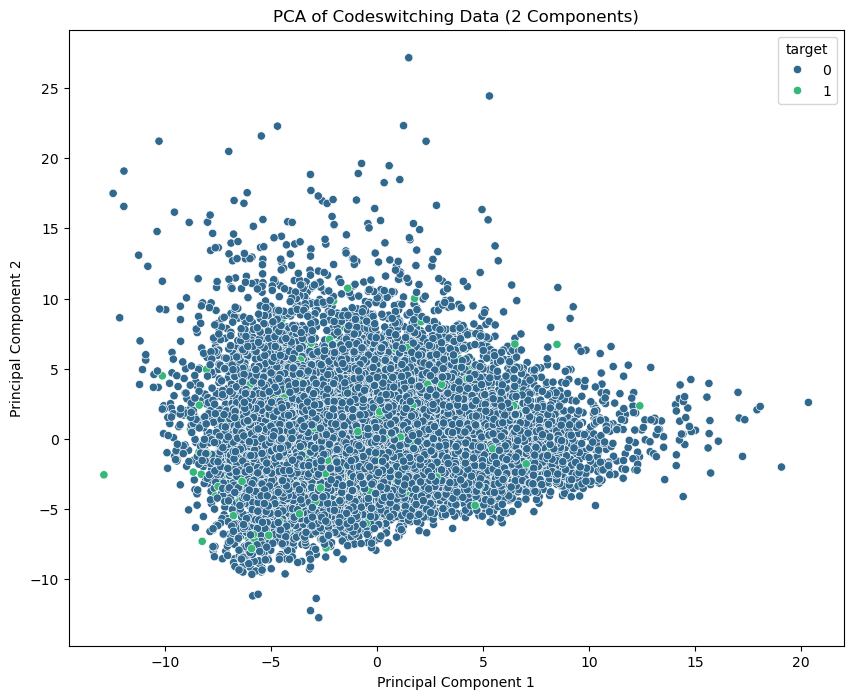

Explained Variance Ratio (2 components): [0.10043925 0.07906133]


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming X_train (your preprocessed training features) and y_train are available

# Handle missing values (important for PCA)
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Scale the data (PCA is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['target'] = y_train.values

# Visualize the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA of Codeswitching Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Optional: Examine the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio (2 components): {explained_variance_ratio}')

### Analysis: 

A significant amount of the original variance (over 82%) is not represented in this 2D projection.

/Users/suyuan/anaconda3/envs/nlp_lab/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


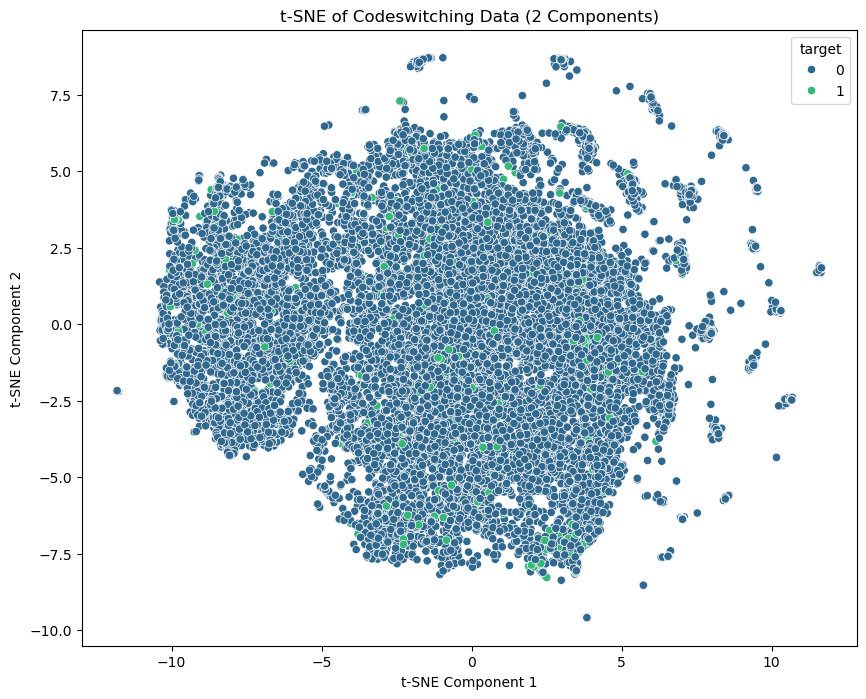

In [62]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 components for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_components = tsne.fit_transform(X_train_scaled)
tsne_df = pd.DataFrame(data=tsne_components, columns=['tsne_component_1', 'tsne_component_2'])
tsne_df['target'] = y_train.values

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_component_1', y='tsne_component_2', hue='target', data=tsne_df, palette='viridis')
plt.title('t-SNE of Codeswitching Data (2 Components)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Optional: Experiment with different perplexity values
# Perplexity typically ranges from 5 to 50.

### Analysis: 

In essence, this t-SNE plot strongly suggests that in the reduced 2D space created by this non-linear method:

The features in our dataset do not clearly delineate the two codeswitching categories. There isn't a strong visual separation, implying that the patterns of features associated with each category are quite similar or intertwined.

The underlying relationships in our data might be complex and non-linear. The lack of simple clusters hints at this.
What this means for our codeswitching analysis:

Difficulty in Classification: As our goal is to classify these two types of codeswitching, this visualization suggests it might be a difficult task with the current set of features. A classification model might struggle to achieve high accuracy.

Need for Feature Engineering or More Data: We might need to consider engineering new features that could better capture the differences between the categories, or perhaps collecting more relevant data.

Exploring Other Techniques: It might be worthwhile for us to explore other dimensionality reduction or visualization techniques, or to directly apply classification algorithms to the high-dimensional data to see their performance.

## Baseline model

In [63]:
y_train.value_counts()

cs_non_english
0    16631
1      502
Name: count, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Handle missing values
# Use median for continuous features and mode for binary features
imputer_continuous = SimpleImputer(strategy='median')
imputer_binary = SimpleImputer(strategy='most_frequent')

# Identify binary and continuous columns
binary_cols = [col for col in X_train.columns if X_train[col].nunique() <= 2]  # Binary if unique values <= 2
continuous_cols = [col for col in X_train.columns if col not in binary_cols]

# Apply imputation
X_train_binary = pd.DataFrame(imputer_binary.fit_transform(X_train[binary_cols]), 
                              columns=binary_cols, index=X_train.index)
X_test_binary = pd.DataFrame(imputer_binary.transform(X_test[binary_cols]), 
                             columns=binary_cols, index=X_test.index)

X_train_continuous = pd.DataFrame(imputer_continuous.fit_transform(X_train[continuous_cols]), 
                                  columns=continuous_cols, index=X_train.index)
X_test_continuous = pd.DataFrame(imputer_continuous.transform(X_test[continuous_cols]), 
                                 columns=continuous_cols, index=X_test.index)

# Scale only continuous features
scaler = StandardScaler()
X_train_continuous_scaled = pd.DataFrame(scaler.fit_transform(X_train_continuous), 
                                         columns=continuous_cols, index=X_train.index)
X_test_continuous_scaled = pd.DataFrame(scaler.transform(X_test_continuous), 
                                        columns=continuous_cols, index=X_test.index)

# Combine binary and scaled continuous features
X_train_final = pd.concat([X_train_binary, X_train_continuous_scaled], axis=1)
X_test_final = pd.concat([X_test_binary, X_test_continuous_scaled], axis=1)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_final)  # Corrected this line

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_final.columns,
    'coefficient': np.abs(logreg.coef_[0])
})
feature_importance = feature_importance.sort_values(by='coefficient', ascending=False)
print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))


Accuracy: 0.7787

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      4190
           1       0.07      0.71      0.12        94

    accuracy                           0.78      4284
   macro avg       0.53      0.75      0.50      4284
weighted avg       0.97      0.78      0.86      4284


Top 10 Feature Importances:
                                       feature  coefficient
68  F0semitoneFrom27.5Hz_sma3nz_percentile20.0     2.391571
5                                          sil     2.204673
71    F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2     2.158042
70  F0semitoneFrom27.5Hz_sma3nz_percentile80.0     1.921585
3                                          EY0     1.533420
0                                          AE0     1.378575
2                                          AW2     1.202176
4                                          UH2     1.094353
1                                          AO2     1.083896
65 

## Model selection and optimization

In [65]:
## Model Selection and Optimization

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define models for comparison
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVC': SVC(random_state=42, class_weight='balanced')
}

# Define scorer for F1 score of the minority class (cs_non_english=1)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Perform cross-validation and compare models
print("Cross-Validation F1 Scores:")
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    model_scores[name] = mean_score
    print(f"{name}: Mean F1 = {mean_score:.4f} (+/- {std_score:.4f})")

# Select the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with F1 Score: {model_scores[best_model_name]:.4f}")

# Hyperparameter optimization for the best model
print("\nPerforming Hyperparameter Optimization for", best_model_name)



Cross-Validation F1 Scores:
LogisticRegression: Mean F1 = 0.1567 (+/- 0.0055)
RandomForest: Mean F1 = 0.1267 (+/- 0.0208)
SVC: Mean F1 = 0.4230 (+/- 0.0131)

Best Model: SVC with F1 Score: 0.4230

Performing Hyperparameter Optimization for SVC


## Hyperparameter tuning

### Logistic Regression hyperparameter tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid_logreg = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'],  # Solvers that support l1 and l2 with balanced weights
#     'class_weight': ['balanced']  # Keeping it balanced for now
#     # You could also add 'class_weight': [None, 'balanced', {0: w0, 1: w1}] for more fine-tuning
# }

In [ ]:
# grid_search_logreg = GridSearchCV(models['LogisticRegression'], param_grid_logreg, cv=5, scoring=f1_scorer, n_jobs=-1, verbose=1)
# grid_search_logreg.fit(X_train_final, y_train)

# # Get the best hyperparameters and the best score
# best_params_logreg = grid_search_logreg.best_params_
# best_score_logreg = grid_search_logreg.best_score_

# print("\nBest Hyperparameters for Logistic Regression:", best_params_logreg)
# print("Best F1 Score on Training Data (with hyperparameter tuning):", best_score_logreg)

# # Get the best Logistic Regression model with the tuned hyperparameters
# tuned_logreg_model = grid_search_logreg.best_estimator_

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report

# # Make predictions on the test set using the tuned Logistic Regression model
# y_pred_tuned_logreg = tuned_logreg_model.predict(X_test_final)

# # Evaluate the tuned model
# accuracy_tuned_logreg = accuracy_score(y_test, y_pred_tuned_logreg)
# print(f"\nAccuracy of Tuned Logistic Regression on Test Set: {accuracy_tuned_logreg:.4f}")

# print("\nClassification Report of Tuned Logistic Regression on Test Set:")
# print(classification_report(y_test, y_pred_tuned_logreg, zero_division=0))


Accuracy of Tuned Logistic Regression on Test Set: 0.9283

Classification Report of Tuned Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4281
           1       0.00      0.33      0.01         3

    accuracy                           0.93      4284
   macro avg       0.50      0.63      0.48      4284
weighted avg       1.00      0.93      0.96      4284



### SVC hyperparameter tuning

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
    # Add more hyperparameters and values as needed
}

In [69]:
grid_search_svc = GridSearchCV(models['SVC'], param_grid_svc, cv=5, scoring=f1_scorer, n_jobs=-1, verbose=1)  # Use models['SVC'] here
grid_search_svc.fit(X_train_final, y_train)

# Get the best hyperparameters and the best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("\nBest Hyperparameters for SVC:", best_params_svc)
print("Best F1 Score on Training Data (with hyperparameter tuning):", best_score_svc)

# Get the best model with the tuned hyperparameters
tuned_svc_model = grid_search_svc.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Hyperparameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 Score on Training Data (with hyperparameter tuning): 0.5013639970223264


In [70]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set using the tuned model
y_pred_tuned_svc = tuned_svc_model.predict(X_test_final)

# Evaluate the tuned model
accuracy_tuned_svc = accuracy_score(y_test, y_pred_tuned_svc)
print(f"\nAccuracy of Tuned SVC on Test Set: {accuracy_tuned_svc:.4f}")

print("\nClassification Report of Tuned SVC on Test Set:")
print(classification_report(y_test, y_pred_tuned_svc, zero_division=0))


Accuracy of Tuned SVC on Test Set: 0.9802

Classification Report of Tuned SVC on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4190
           1       0.56      0.46      0.50        94

    accuracy                           0.98      4284
   macro avg       0.77      0.72      0.75      4284
weighted avg       0.98      0.98      0.98      4284

